In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [46]:
import plotly.graph_objs as go

In [3]:
df1 = pd.read_csv('datasets_14872_228180_Admission_Predict.csv')
df2 = pd.read_csv('datasets_14872_228180_Admission_Predict_Ver1.1.csv')

In [4]:
len(df1)

400

In [5]:
len(df2)

500

In [6]:
frames = [df1, df2]

df = pd.concat(frames)

In [7]:
df=df.drop(['Serial No.'], axis = 1)
df

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit   
0                0.92  
1                0.76  
2                0.72  
3                0.80  
4                0.65  
..                ...  
495              0.87  
496              0.96  
497              0.93  
498              0.73  
499              0.84  

[900 rows x 8 columns]

In [8]:
df['Chance of Admit ']

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 900, dtype: float64

In [9]:
df['Research'].unique

<bound method Series.unique of 0      1
1      1
2      1
3      1
4      0
      ..
495    1
496    1
497    1
498    0
499    0
Name: Research, Length: 900, dtype: int64>

In [27]:
df.describe()

GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  900.000000   900.000000         900.000000  900.000000  900.00000   
mean   316.621111   107.288889           3.102222    3.385556    3.47000   
std     11.369700     6.073968           1.143048    0.997612    0.91319   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit   
count  900.000000  900.000000        900.000000  
mean     8.586433    0.554444          0.722900  
std      0.600822    0.497303          0.141722  
min      6.800000    0.000000          0.340000  
25%      8.140000    0.000000          0.640000  
50%      8.570000    1.000000          0.730000  
75%      9.052500    1.000000          0.822500  
max      9.920000    1.000000          0.970000

In [29]:
df.head(10)

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   
5        330          115                  5  4.5   3.0  9.34         1   
6        321          109                  3  3.0   4.0  8.20         1   
7        308          101                  2  3.0   4.0  7.90         0   
8        302          102                  1  2.0   1.5  8.00         0   
9        323          108                  3  3.5   3.0  8.60         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65  
5              0.90  
6              0.75  
7              0.68  
8              0.50  
9              0.45

In [11]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

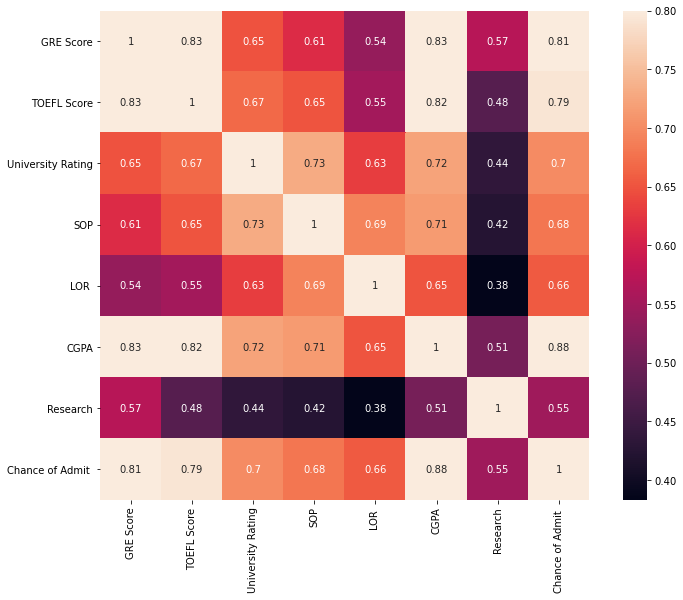

In [12]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

In [13]:
query1 = df[df['Chance of Admit ']>0.75]
query1

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
3          322          110                  3  3.5   2.5  8.67         1   
5          330          115                  5  4.5   3.0  9.34         1   
11         327          111                  4  4.0   4.5  9.00         1   
..         ...          ...                ...  ...   ...   ...       ...   
488        322          112                  3  3.0   4.0  8.62         1   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit   
0                0.92  
1                0.76  
3                0.80  
5                0.90  
11               0.84  
..                ...  
488              0.76  
495              0.87  
496              0.96  
497              0.93  
499              0.84  

[382 rows x 8 columns]

In [14]:
color=['Orange', 'Yellow', 'Green', 'Blue', 'Purple', 'Violet', 'Pink']

In [15]:
cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']

In [16]:
cols1 = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

In [17]:
#univariate analysis
import plotly.express as px
import plotly.offline as pyoff
x=0
for i in cols1:
    #df = px.data.tips()
    fig = px.histogram(df, x=i, nbins=100, opacity=0.8,
                   color_discrete_sequence=[color[x%7]])
    fig.show()
    data = [go.Box(
        x=df[i],
        name = i,
        marker = dict(
            color = color[x%7],
        )
    )]
    pyoff.iplot(data)
    x+=1

In [18]:
col2=['University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']

In [19]:
for i in cols:
    group1=df.groupby([i])['Chance of Admit '].count()
    lis=list(group1.index)
    data=[]
    x=0
    for j in lis:
        trace = go.Box(
            y=df[df[i]==j]['Chance of Admit '],
            name = j,
            marker = dict(
            color = color[x%7],
            )
        )
        x+=1
        data.append(trace)
        layout = dict(title = 'Chance of Admit vs '+i,
              yaxis= dict(title= 'Chance of Admit ',ticklen= 5,zeroline= False),
              xaxis= dict(title= i, ticklen= 5,zeroline= False)
             )
    fig = dict(data = data, layout = layout)
    pyoff.iplot(fig)

In [30]:
# import graph objects as "go"
import plotly.graph_objs as go
import plotly.offline as pyoff
# creating trace1
data =go.Scatter(
                    x = df['GRE Score'],
                    y = df['Chance of Admit '],
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = df['CGPA'], showscale = True),
                    text = df['CGPA']
                    )



layout = dict(title = 'Chance of Admit vs GRE Score',
              yaxis= dict(title= 'Chance of Admit ',ticklen= 5,zeroline= False),
              xaxis= dict(title= 'GRE Score',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
pyoff.iplot(fig)

In [21]:
# import graph objects as "go"
import plotly.graph_objs as go
import plotly.offline as pyoff
# creating trace1
data =go.Scatter(
                    x = df['GRE Score'],
                    y = df['Chance of Admit '],
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = df['SOP'], showscale = True),
                    text = df['SOP']
                    )



layout = dict(title = 'Scatter',
              yaxis= dict(title= 'Chance of Admit ',ticklen= 5,zeroline= False),
              xaxis= dict(title= 'GRE Score',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
pyoff.iplot(fig)

In [22]:
# import graph objects as "go"
import plotly.graph_objs as go
import plotly.offline as pyoff
# creating trace1
data =go.Scatter(
                    x = df['GRE Score'],
                    y = df['Chance of Admit '],
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = df['University Rating'], showscale = True),
                    text = df['University Rating']
                    )



layout = dict(title = 'Scatter',
              yaxis= dict(title= 'Chance of Admit ',ticklen= 5,zeroline= False),
              xaxis= dict(title= 'GRE Score',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
pyoff.iplot(fig)

In [23]:
# import graph objects as "go"
import plotly.graph_objs as go
import plotly.offline as pyoff
# creating trace1
data =go.Scatter(
                    x = df['GRE Score'],
                    y = df['Chance of Admit '],
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = df['Research'], showscale = True),
                    text = df['Research']
                    )



layout = dict(title = 'Scatter',
              yaxis= dict(title= 'Chance of Admit ',ticklen= 5,zeroline= False),
              xaxis= dict(title= 'GRE Score',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
pyoff.iplot(fig)

In [24]:
plot_data = [
    go.Scatter(
        x=df['GRE Score'],
        y=df['Chance of Admit '],
        mode = "markers"
        #name=i,
        #marker = dict(color = colors[x])
            
        ),
    go.Scatter(
        x=query1['GRE Score'],
        y=query1['Chance of Admit '],
        mode = "markers",
        name='GRE Score',
        marker = dict(color = 'Red')
            
        ),
    
]
plot_layout = go.Layout(
        #title=i,
        yaxis_title='Chance of Admit ',
        xaxis_title='Month'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [25]:
x=0
for i in cols:
    plot_data = [
        go.Scatter(
            x=df[i],
            y=df['Chance of Admit '],
            mode = "markers",
            name=i,
            marker = dict(color = color[x])

            ),
        go.Scatter(
            x=query1[i],
            y=query1['Chance of Admit '],
            mode = "markers",
            name='> 75% Chance',
            marker = dict(color = 'Red')

            ),

    ]
    plot_layout = go.Layout(
            #title=i,
            yaxis_title='Chance of Admit ',
            xaxis_title=i
        )
    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)
    x+=1

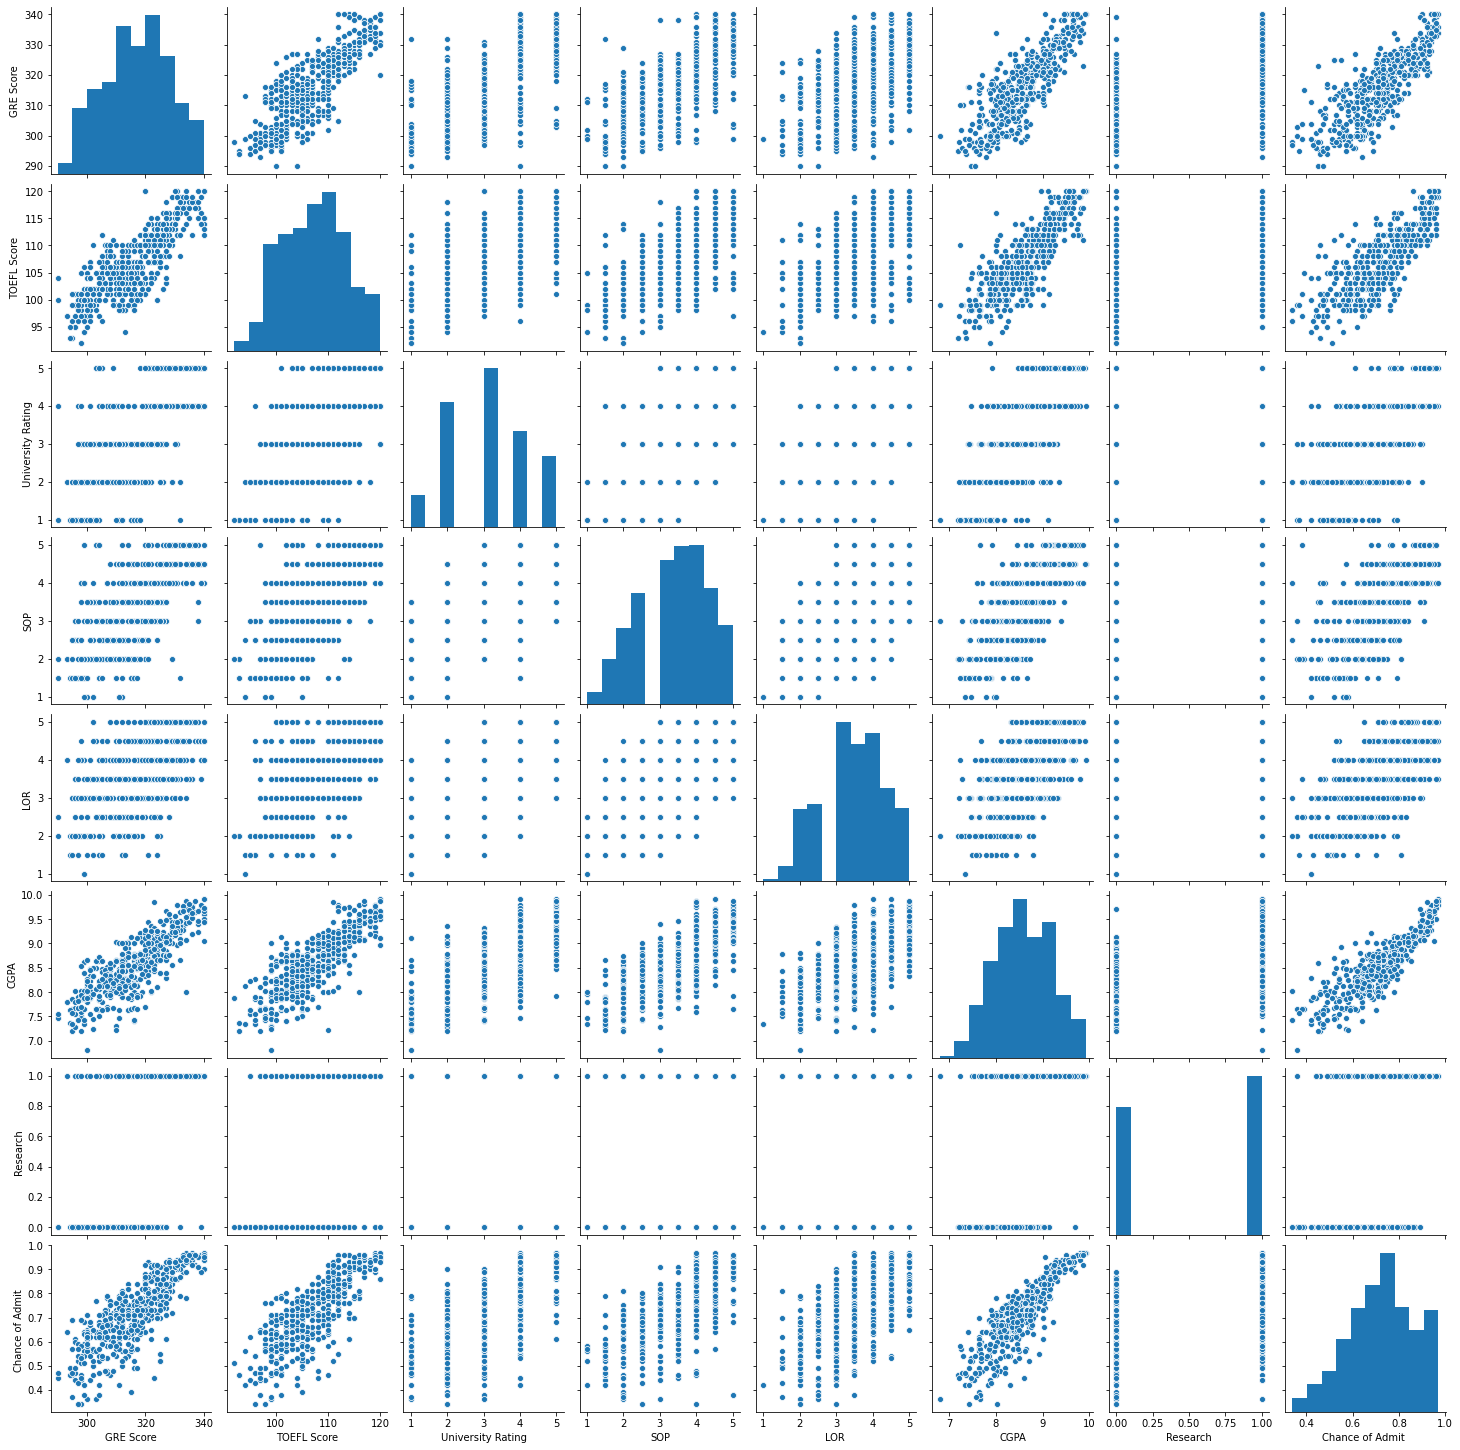

In [26]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [32]:
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics
%matplotlib inline

In [34]:
X = df.drop(['Chance of Admit '], axis=1).values
y = df['Chance of Admit '].values

In [363]:
print(X.shape)
print(y.shape)

(900, 7)
(900,)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [365]:
model_ = []

In [366]:
lr = LinearRegression()  
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Root Mean Squared Error for LinearRegression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
model_.append(['LinearRegression', np.sqrt(metrics.mean_squared_error(y_test, y_pred))])
lasso = Lasso()  
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print('Root Mean Squared Error for lasso:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
model_.append(['Lasso', np.sqrt(metrics.mean_squared_error(y_test, y_pred))])
ridge = Ridge()  
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('Root Mean Squared Error for ridge:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
model_.append(['Ridge', np.sqrt(metrics.mean_squared_error(y_test, y_pred))])
en = ElasticNet()  
en.fit(X_train, y_train)
y_pred = en.predict(X_test)
print('Root Mean Squared Error for ElasticNet:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
model_.append(['ElasticNet', np.sqrt(metrics.mean_squared_error(y_test, y_pred))])
knn = KNeighborsRegressor()  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Root Mean Squared Error for knn:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
model_.append(['knn', np.sqrt(metrics.mean_squared_error(y_test, y_pred))])
dt = DecisionTreeRegressor()  
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Root Mean Squared Error for DecisionTree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
model_.append(['DecisionTree', np.sqrt(metrics.mean_squared_error(y_test, y_pred))])
svm = SVR()  
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Root Mean Squared Error for svm:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
model_.append(['svm', np.sqrt(metrics.mean_squared_error(y_test, y_pred))])

Root Mean Squared Error for LinearRegression: 0.06604417749266837
Root Mean Squared Error for lasso: 0.12744426248017154
Root Mean Squared Error for ridge: 0.0660967409150697
Root Mean Squared Error for ElasticNet: 0.10031946396412199
Root Mean Squared Error for knn: 0.06616696053671098
Root Mean Squared Error for DecisionTree: 0.04711098008367524
Root Mean Squared Error for svm: 0.08288320707937942


In [70]:
lr = LinearRegression()  
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Root Mean Squared Error for LinearRegression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for LinearRegression: 0.06604417749266837


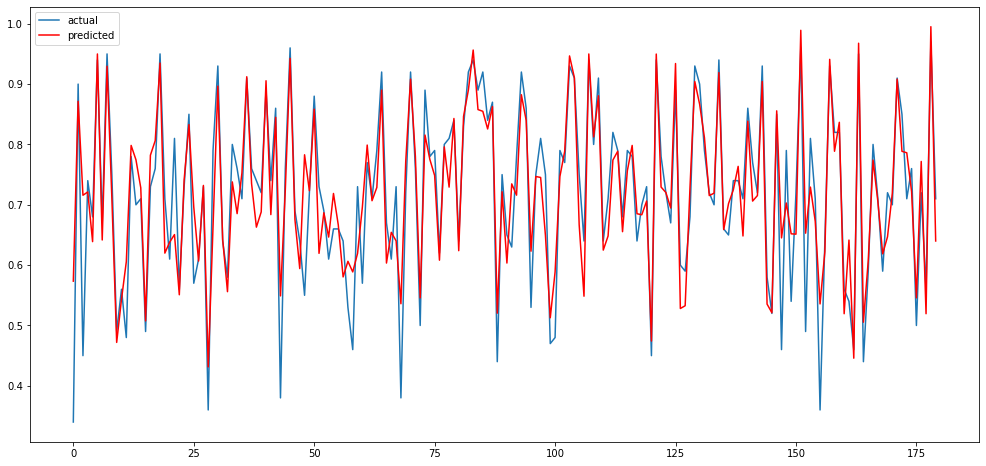

In [71]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
#plot monthly sales
plot_data = [
    go.Scatter(
        x=df['DeviceTimeStamp'],
        y=df['OTI'],
    )
]
plot_layout = go.Layout(
        title='OTI change'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [72]:
ridge = Ridge()  
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('Root Mean Squared Error for ridge:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for ridge: 0.0660967409150697


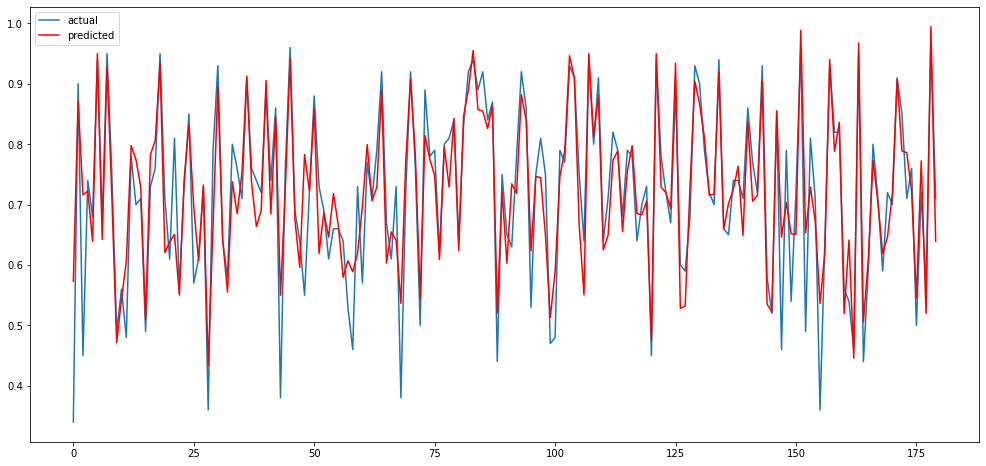

In [73]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

In [74]:
lasso = Lasso()  
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print('Root Mean Squared Error for lasso:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for lasso: 0.12744426248017154


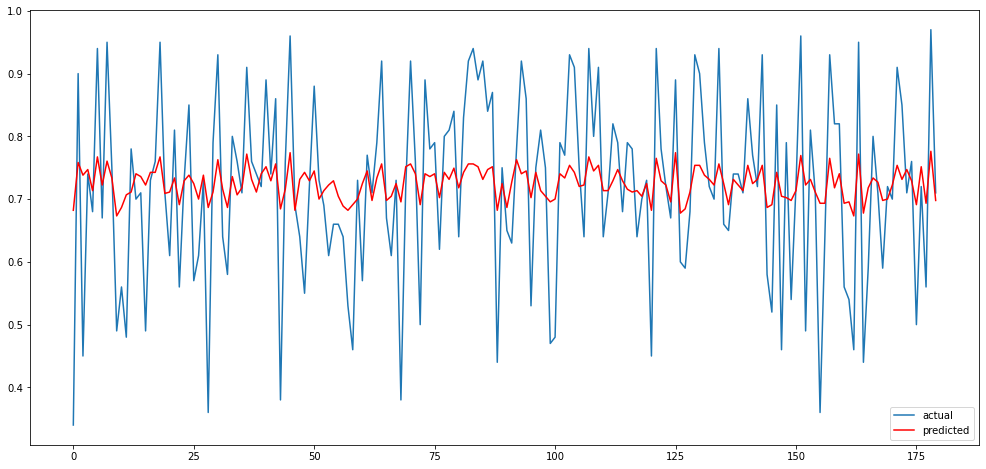

In [75]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

In [76]:
en = ElasticNet()  
en.fit(X_train, y_train)
y_pred = en.predict(X_test)
print('Root Mean Squared Error for ElasticNet:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for ElasticNet: 0.10031946396412199


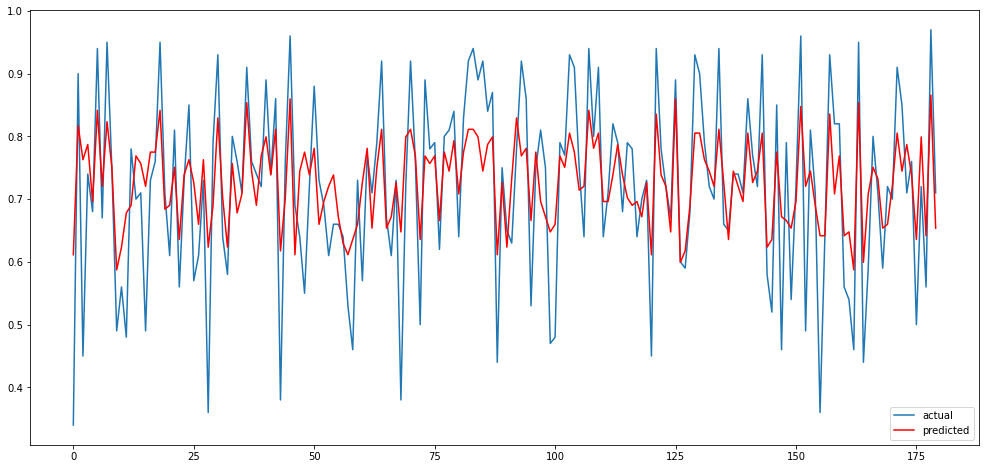

In [77]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

In [78]:
knn = KNeighborsRegressor()  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Root Mean Squared Error for knn:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for knn: 0.06616696053671098


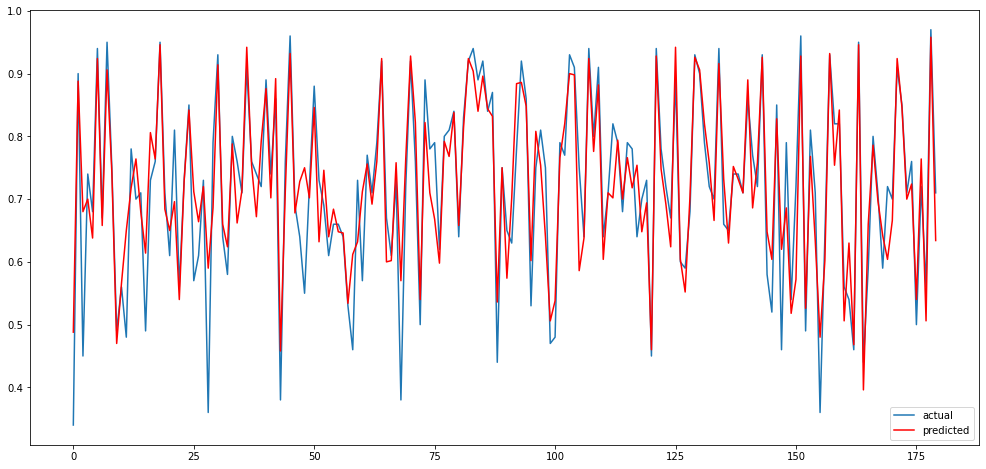

In [79]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

In [80]:
dt = DecisionTreeRegressor()  
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Root Mean Squared Error for DecisionTree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for DecisionTree: 0.04882508462756505


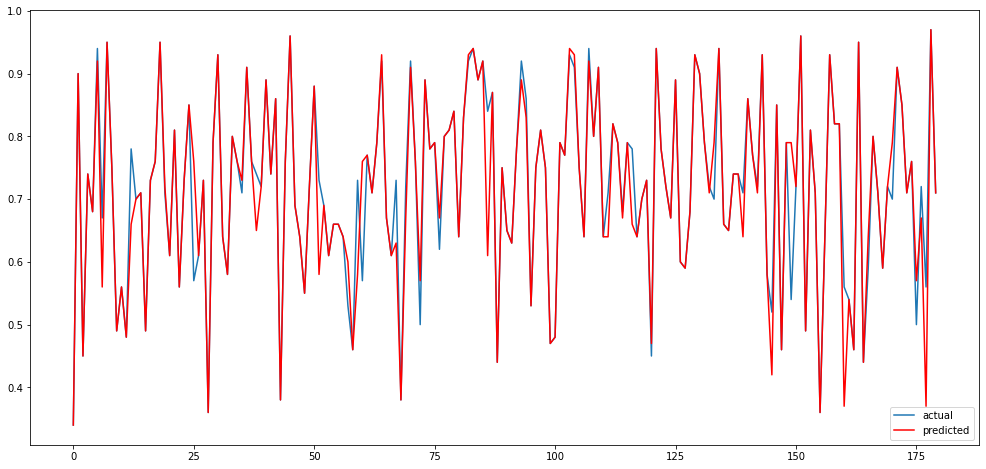

In [81]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

In [82]:
svm = SVR()  
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Root Mean Squared Error for svm:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for svm: 0.08288320707937942


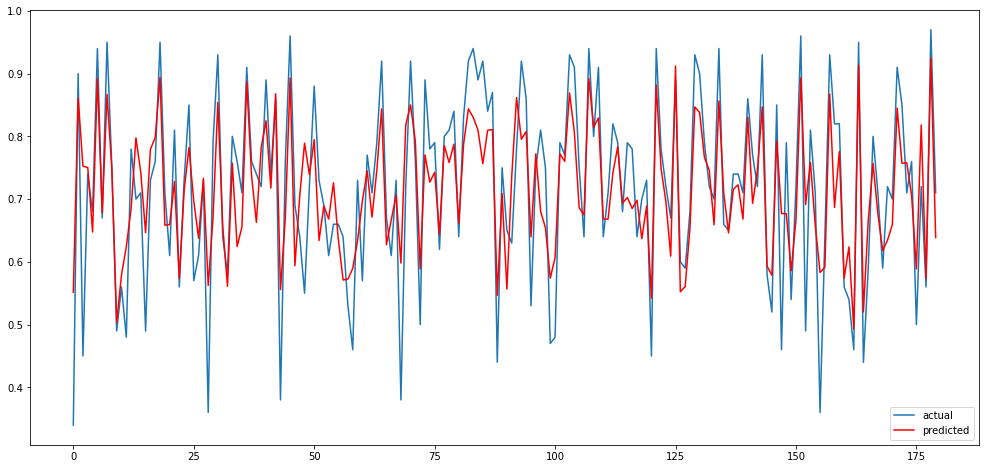

In [83]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

In [84]:
from sklearn.ensemble import RandomForestRegressor 

In [63]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

In [85]:
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [86]:
y_pred = regressor.predict(X_test)

In [66]:
model_.append(['RandomForest', np.sqrt(metrics.mean_squared_error(y_test, y_pred))])

NameError: name 'model_' is not defined

In [87]:
print('Root Mean Squared Error for rf:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for rf: 0.03929464622849053


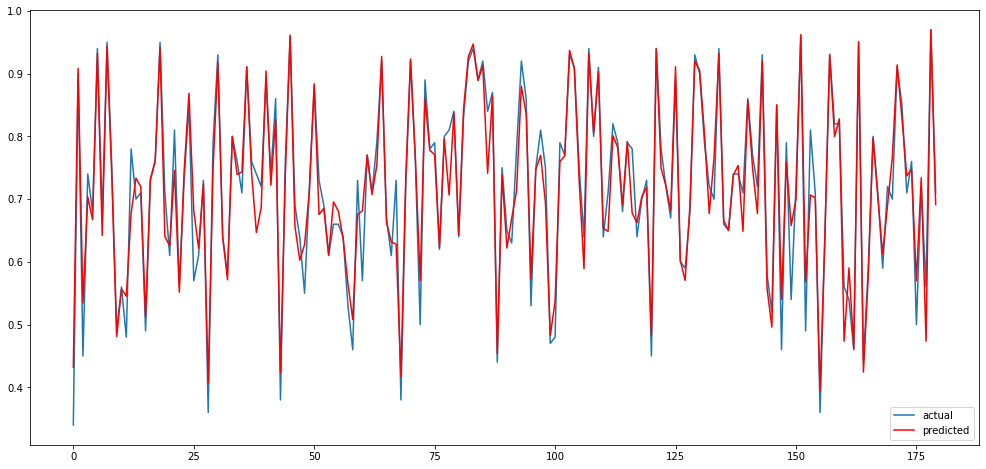

In [88]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

In [373]:
model_

[['LinearRegression', 0.06604417749266837],
 ['Lasso', 0.12744426248017154],
 ['Ridge', 0.0660967409150697],
 ['ElasticNet', 0.10031946396412199],
 ['knn', 0.06616696053671098],
 ['DecisionTree', 0.04711098008367524],
 ['svm', 0.08288320707937942],
 ['RandomForest', 0.03929464622849053]]

In [374]:
models = pd.DataFrame(model_,columns=['Model', 'RMSE'])

In [375]:
models=models.sort_values(by=['RMSE'])

In [376]:
models=models.reset_index()

In [377]:
models

index             Model      RMSE
0      7      RandomForest  0.039295
1      5      DecisionTree  0.047111
2      0  LinearRegression  0.066044
3      2             Ridge  0.066097
4      4               knn  0.066167
5      6               svm  0.082883
6      3        ElasticNet  0.100319
7      1             Lasso  0.127444

In [378]:
# import graph objects as "go"
import plotly.graph_objs as go
import plotly.offline as pyoff
# creating trace1
data =go.Scatter(
                    y = models['Model'],
                    x = models['RMSE'],
                    name = "Best Model",
                    )



layout = dict(title = 'Best Model',
              yaxis= dict(title= 'Model',ticklen= 5,zeroline= False),
              xaxis= dict(title= 'RMSE',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
pyoff.iplot(fig)

In [379]:
# import graph objects as "go"
import plotly.graph_objs as go
import plotly.offline as pyoff
# creating trace1
data =go.Bar(
                    x = models['Model'],
                    y = models['RMSE'],
                    name = "Best Model",
                    )



layout = dict(title = 'Best Model',
              yaxis= dict(title= 'Model',ticklen= 5,zeroline= False),
              xaxis= dict(title= 'RMSE',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
pyoff.iplot(fig)

In [380]:
import plotly.express as px
fig = px.bar(models, x="Model", y="RMSE", color='Model')
fig.show()

In [381]:
X_test

array([[298.  ,  98.  ,   2.  , ...,   3.  ,   8.03,   0.  ],
       [332.  , 118.  ,   2.  , ...,   3.5 ,   9.36,   1.  ],
       [323.  , 108.  ,   3.  , ...,   3.  ,   8.6 ,   0.  ],
       ...,
       [303.  ,  98.  ,   1.  , ...,   2.5 ,   7.65,   0.  ],
       [340.  , 120.  ,   5.  , ...,   4.5 ,   9.91,   1.  ],
       [305.  , 107.  ,   2.  , ...,   2.5 ,   8.42,   0.  ]])

In [382]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [383]:
my_chance1=[315, 105, 4, 4, 4, 9.5, 1]

In [384]:
creds=np.array(my_chance1)

In [385]:
creds

array([315. , 105. ,   4. ,   4. ,   4. ,   9.5,   1. ])

In [386]:
my_chance=creds.reshape(-1, 7)

In [387]:
my_chance

array([[315. , 105. ,   4. ,   4. ,   4. ,   9.5,   1. ]])

In [388]:
My_prediced_chance = regressor.predict(my_chance)

In [389]:
My_prediced_chance

array([0.8937])

In [390]:
df_ = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_

Actual  Predicted
0      0.34     0.4322
1      0.90     0.9085
2      0.45     0.5343
3      0.74     0.7037
4      0.68     0.6672
..      ...        ...
175    0.50     0.5699
176    0.72     0.7341
177    0.56     0.4736
178    0.97     0.9698
179    0.71     0.6913

[180 rows x 2 columns]

In [391]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.03929464622849053
